In [3]:
import pandas as pd
import numpy as np
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.tokenize import word_tokenize, RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
import datetime as dt
from langdetect import detect

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sonakshimendiratta/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sonakshimendiratta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
# detects the language of the comment
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [5]:
raw_data = pd.read_csv("/IS5126airbnb_reviews_full.csv",low_memory = False)

In [6]:
raw_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,49091,8243238,2013-10-21,8557223,Jared,Fran was absolutely gracious and welcoming. Ma...
1,50646,11909864,2014-04-18,1356099,James,A comfortable room in a smart condo developmen...
2,50646,13823948,2014-06-05,15222393,Welli,Stayed over at Sujatha's house for 3 good nigh...
3,50646,15117222,2014-07-02,5543172,Cyril,It's been a lovely stay at Sujatha's. The room...
4,50646,15426462,2014-07-08,817532,Jake,"We had a great experience. A nice place, an am..."


In [7]:
raw_data_filtered= raw_data[['listing_id','id','comments']]

In [10]:
raw_data_filtered.dtypes

listing_id     int64
id             int64
comments      object
dtype: object

In [12]:
# group by hosts and count the number of unique listings --> cast it to a dataframe
reviews_per_listing = pd.DataFrame(raw_data.groupby('listing_id')['id'].nunique())

# sort unique values descending and show the Top20
reviews_per_listing.sort_values(by=['id'], ascending=False, inplace=True)
reviews_per_listing.head(20)

,id
listing_id,
2129215,370
10848771,354
21509015,351
2357514,336
7605283,322
12299983,316
13462899,312
4108082,312
5827998,296


In [53]:
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [54]:
raw_data_filtered['language'] = raw_data_filtered['comments'].apply(language_detection)

In [56]:
raw_data_filtered.language.value_counts().head(10)

en       1582139
zh-cn     122253
ko         77120
fr         23800
de         17986
ja         11405
so          9569
ro          9015
es          7648
ru          5229
Name: language, dtype: int64

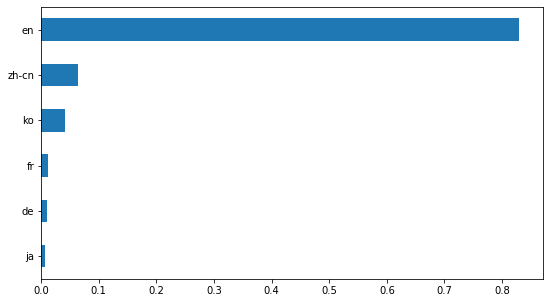

In [57]:
# visualizing the comments' languages a) quick and dirty
ax = raw_data_filtered.language.value_counts(normalize=True).head(6).sort_values().plot(kind='barh', figsize=(9,5));

In [60]:
df_eng = raw_data_filtered[(raw_data_filtered['language']=='en')]

In [15]:
# import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

In [18]:
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title('Word Cloud for Comments\n', fontsize=18, fontweight='bold')
    plt.show()

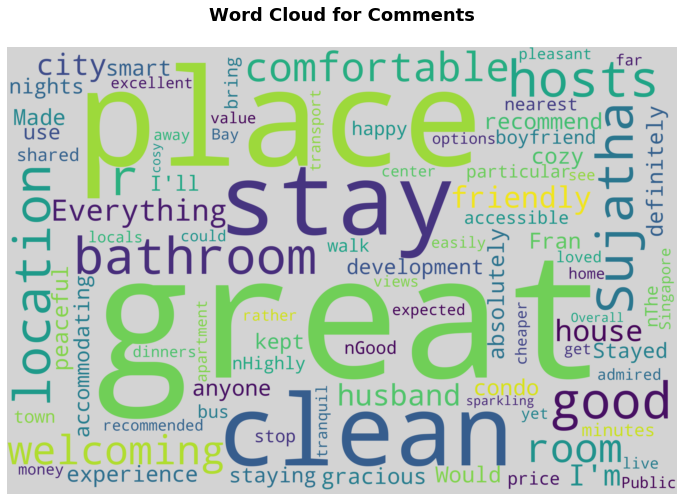

In [19]:
wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="lightgrey", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(raw_data_filtered.comments.values))

plot_wordcloud(wordcloud, 'English')

In [20]:
# load the SentimentIntensityAnalyser object in
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# assign it to another name to make it easier to use
analyzer = SentimentIntensityAnalyzer()
# use the polarity_scores() method to get the sentiment metrics
def print_sentiment_scores(sentence):
    snt = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [24]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(str(text))['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(str(text))['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(str(text))['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(str(text))['compound']
    return compound_value

In [26]:
raw_data_filtered['sentiment_neg'] = raw_data_filtered['comments'].apply(negative_score)
raw_data_filtered['sentiment_neu'] = raw_data_filtered['comments'].apply(neutral_score)
raw_data_filtered['sentiment_pos'] = raw_data_filtered['comments'].apply(positive_score)
raw_data_filtered['sentiment_compound'] = raw_data_filtered['comments'].apply(compound_score)

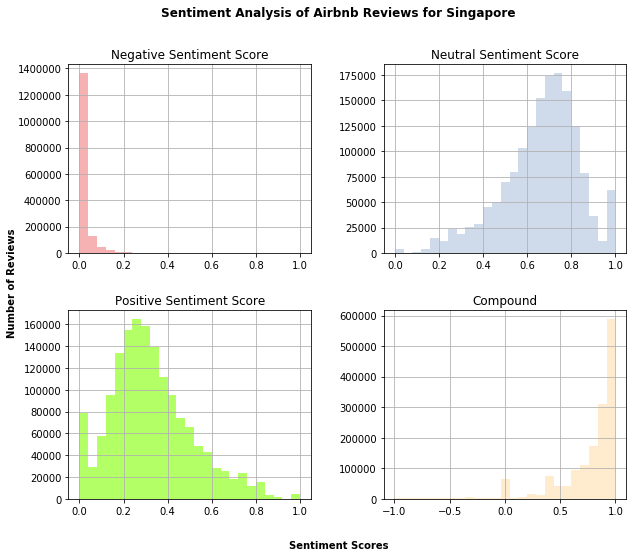

In [61]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
df_eng.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
df_eng.hist('sentiment_neu', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
df_eng.hist('sentiment_pos', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
df_eng.hist('sentiment_compound', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of Airbnb Reviews for Singapore\n\n', fontsize=12, fontweight='bold');

In [62]:
percentiles = df_eng.sentiment_compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
percentiles

count    1.582139e+06
mean     7.496965e-01
std      3.137156e-01
min     -9.964000e-01
5%       0.000000e+00
10%      4.019000e-01
20%      6.249000e-01
30%      7.346000e-01
40%      8.207000e-01
50%      8.744000e-01
60%      9.116000e-01
70%      9.381000e-01
80%      9.589000e-01
90%      9.764000e-01
max      9.997000e-01
Name: sentiment_compound, dtype: float64

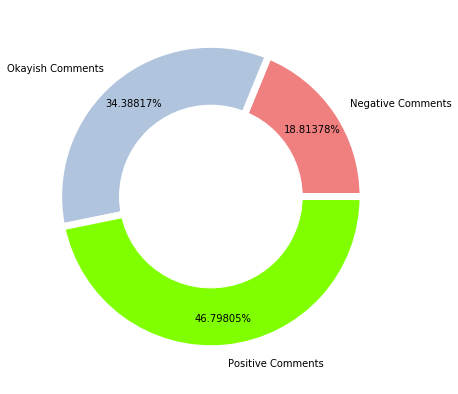

In [63]:
# assign the data
neg = percentiles['10%']
mid = percentiles['30%']
pos = percentiles['max']
names = ['Negative Comments', 'Okayish Comments','Positive Comments']
size = [neg, mid, pos]

# call a pie chart
plt.pie(size, labels=names, colors=['lightcoral', 'lightsteelblue', 'chartreuse'], 
        autopct='%.5f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

In [64]:
df_eng.head()

,listing_id,id,comments,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,language
0,49091,8243238,Fran was absolutely gracious and welcoming. Made my stay a great experience. Would definitely recommend this cozy and peaceful place to anyone.,0.000,0.434,0.566,0.9615,en
1,50646,11909864,A comfortable room in a smart condo development. Everything was kept very clean and I had the use of my own bathroom. Sujatha and her husband are great hosts - very friendly and accommodating. I'll be staying here again.,0.000,0.644,0.356,0.9484,en
2,50646,13823948,"Stayed over at Sujatha's house for 3 good nights with my boyfriend. Sujatha and her husband are great hosts, very welcoming and friendly. The room is comfortable and clean. I'm happy to have my own bathroom as i'm particular with shared bathroom. \r\nThe location is accessible. A few minutes walk from the house to nearest bus stop which can bring you to town.\r\nGood place, good hosts, good price.\r\nHighly recommended!",0.023,0.589,0.388,0.9868,en
3,50646,15117222,It's been a lovely stay at Sujatha's. The room is clean and the location is just perfect for a stop-over in Singapore. I really enjoyed relaxing at the swimming pool after spending most of the day in the city. Thank you Sujatha.,0.000,0.625,0.375,0.9627,en
4,50646,15426462,"We had a great experience. A nice place, an amazing complex and easy access to public transit",0.000,0.447,0.553,0.9274,en


In [34]:
pd.set_option("max_colwidth", 1000)

In [68]:
df_neu = df_eng.loc[df_eng.sentiment_compound <= 0.5]

In [70]:
# full dataframe with POSITIVE comments
df_pos = df_eng.loc[df_eng.sentiment_compound >= 0.95]

# only corpus of POSITIVE comments
pos_comments = df_pos['comments'].tolist()

In [71]:
# full dataframe with NEGATIVE comments
df_neg = df_eng.loc[df_eng.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
neg_comments = df_neg['comments'].tolist()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


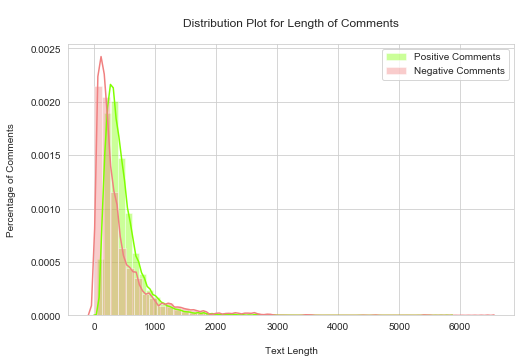

In [72]:
df_pos['text_length'] = df_pos['comments'].apply(len)
df_neg['text_length'] = df_neg['comments'].apply(len)

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(df_pos['text_length'], kde=True, bins=50, color='chartreuse')
sns.distplot(df_neg['text_length'], kde=True, bins=50, color='lightcoral')

plt.title('\nDistribution Plot for Length of Comments\n')
plt.legend(['Positive Comments', 'Negative Comments'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Comments\n');

In [73]:
df_eng.head()

,listing_id,id,comments,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,language
0,49091,8243238,Fran was absolutely gracious and welcoming. Made my stay a great experience. Would definitely recommend this cozy and peaceful place to anyone.,0.000,0.434,0.566,0.9615,en
1,50646,11909864,A comfortable room in a smart condo development. Everything was kept very clean and I had the use of my own bathroom. Sujatha and her husband are great hosts - very friendly and accommodating. I'll be staying here again.,0.000,0.644,0.356,0.9484,en
2,50646,13823948,"Stayed over at Sujatha's house for 3 good nights with my boyfriend. Sujatha and her husband are great hosts, very welcoming and friendly. The room is comfortable and clean. I'm happy to have my own bathroom as i'm particular with shared bathroom. \r\nThe location is accessible. A few minutes walk from the house to nearest bus stop which can bring you to town.\r\nGood place, good hosts, good price.\r\nHighly recommended!",0.023,0.589,0.388,0.9868,en
3,50646,15117222,It's been a lovely stay at Sujatha's. The room is clean and the location is just perfect for a stop-over in Singapore. I really enjoyed relaxing at the swimming pool after spending most of the day in the city. Thank you Sujatha.,0.000,0.625,0.375,0.9627,en
4,50646,15426462,"We had a great experience. A nice place, an amazing complex and easy access to public transit",0.000,0.447,0.553,0.9274,en


In [74]:
merged_reviews = pd.merge(left=df_eng, right=raw_data, left_on='id', right_on='id')

In [77]:
merged_reviews.head()

,listing_id_x,id,comments_x,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,language,listing_id_y,date,reviewer_id,reviewer_name,comments_y
0,49091,8243238,Fran was absolutely gracious and welcoming. Made my stay a great experience. Would definitely recommend this cozy and peaceful place to anyone.,0.0,0.434,0.566,0.9615,en,49091,2013-10-21,8557223,Jared,Fran was absolutely gracious and welcoming. Made my stay a great experience. Would definitely recommend this cozy and peaceful place to anyone.
1,49091,8243238,Fran was absolutely gracious and welcoming. Made my stay a great experience. Would definitely recommend this cozy and peaceful place to anyone.,0.0,0.434,0.566,0.9615,en,49091,2013-10-21,8557223,Jared,Fran was absolutely gracious and welcoming. Made my stay a great experience. Would definitely recommend this cozy and peaceful place to anyone.
2,49091,8243238,Fran was absolutely gracious and welcoming. Made my stay a great experience. Would definitely recommend this cozy and peaceful place to anyone.,0.0,0.434,0.566,0.9615,en,49091,2013-10-21,8557223,Jared,Fran was absolutely gracious and welcoming. Made my stay a great experience. Would definitely recommend this cozy and peaceful place to anyone.
3,49091,8243238,Fran was absolutely gracious and welcoming. Made my stay a great experience. Would definitely recommend this cozy and peaceful place to anyone.,0.0,0.434,0.566,0.9615,en,49091,2013-10-21,8557223,Jared,Fran was absolutely gracious and welcoming. Made my stay a great experience. Would definitely recommend this cozy and peaceful place to anyone.
4,49091,8243238,Fran was absolutely gracious and welcoming. Made my stay a great experience. Would definitely recommend this cozy and peaceful place to anyone.,0.0,0.434,0.566,0.9615,en,49091,2013-10-21,8557223,Jared,Fran was absolutely gracious and welcoming. Made my stay a great experience. Would definitely recommend this cozy and peaceful place to anyone.


In [80]:
merged_reviews.drop(['id', 'comments_x', 'language', 'listing_id_y','reviewer_id','reviewer_name','comments_y'], inplace=True, axis=1)

In [90]:
merged_reviews['month'] = pd.to_datetime(merged_reviews['date']).dt.month
merged_reviews['year'] = pd.to_datetime(merged_reviews['date']).dt.year
summary_reviews=merged_reviews.groupby(['year','month','listing_id_x'],as_index=False).mean()

In [91]:
summary_reviews['time_period']=summary_reviews['month'].astype(str)+'-'+summary_reviews['year'].astype(str)

In [92]:
summary_reviews.head()

,year,month,listing_id_x,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,time_period
0,2011,5,71903,0.056,0.713,0.231,0.8577,5-2011
1,2011,6,56334,0.000,0.672,0.328,0.8316,6-2011
2,2011,6,71907,0.000,0.558,0.442,0.9022,6-2011
3,2011,7,56334,0.000,0.577,0.423,0.9336,7-2011
4,2011,7,71896,0.000,0.803,0.197,0.9593,7-2011


In [93]:
summary_reviews.to_csv('/Users/sonakshimendiratta/Documents/NUS/YR 2 SEM 2/IS5126/Final Project/data/review_sentiments.csv')